

#### In following code I have import all the packages and libraries that is required for my project development.

In [109]:
#Importing Pacakages

import pandas as pd #Data Processing
import numpy as np  #for array

import matplotlib.pyplot as plt #Data Visualization
from matplotlib import gridspec
import seaborn as sns 

from sklearn.preprocessing import RobustScaler #for feature scaling
from sklearn.model_selection import train_test_split #for spliting the data
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import KFold
KFold
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore') #for ignore warnings



# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


### Reading and understanding the data

#### I will read the data from CSV file using pandas, and then print the  first five rows by head() and last five rows of the dataset by tail() methods

In [110]:
#Import the dataset

df = pd.read_csv('creditcard.csv')

df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Insight of result
#### We can see from the result that time column is a seconds to define the time between the current and first transactions.Amount column define the amount of the transaction. Class 0 indicates Normal Transaction and 1 indicates Abnormal Transactions. 'Time' and 'Amount' are the only features that are not transformed to PCA.


### Summary of dataset

In [111]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Exploration and Visualization

#### In follwing code I have a look at the number of Abnormal and Normal cases in dataset as well as  also calculate the percentage of abnormal cases and normal cases in the total number of recorded transactions. 



In [112]:
#finding the length of the dataset
cases = len(df)
print("Total Number of Transactions is : ",cases,"\n")

#counting the number of abnormal and normal transactions
abnormal_count = len(df[df.Class == 1])
normal_count = len(df[df.Class == 0])
print("Total Number of Abnoramal Transactions is : ",abnormal_count)
print("Total Number of Normal Transactions is : ",normal_count,"\n")

#calculating the percentage of abnormal and normal transactions
abnormal_percentage = round(abnormal_count/cases*100,2)
normal_percentage = round(normal_count/cases*100,2)
print("Percentage Abnormal Transaction is : ",abnormal_percentage)
print("Percentage of Normal Transaction is : ",normal_percentage)



Total Number of Transactions is :  284807 

Total Number of Abnoramal Transactions is :  492
Total Number of Normal Transactions is :  284315 

Percentage Abnormal Transaction is :  0.17
Percentage of Normal Transaction is :  99.83


### Checking the frequncy of frauds and visualize it by barplot

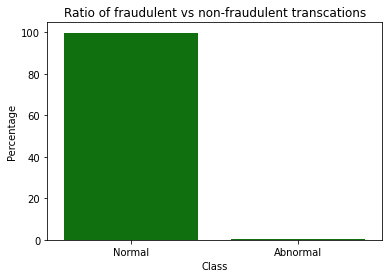

In [113]:
#The fraction of fraudulent vs non-fraudulent transactions is shown as a bar plot.
fraud = {'Class':['Normal', 'Abnormal'], 'Percentage':[normal_percentage, abnormal_percentage]} 
df_fraud = pd.DataFrame(fraud) 


sns.barplot(x='Class',y='Percentage', data=df_fraud, color='g')
plt.title('Ratio of fraudulent vs non-fraudulent transcations')
plt.show()



### Insight of result
#### There are just 492 abnormal incidents out of 284,807 samples, or 0.17 percent of all samples. As a result, I may conclude that the data I am working with is very unbalanced and must be treated with caution while modelling and assessing it. 

#### We are now investigating at the spread of the two designated characteristics which are "Time" and  "Amount" in the dataset is now examined.

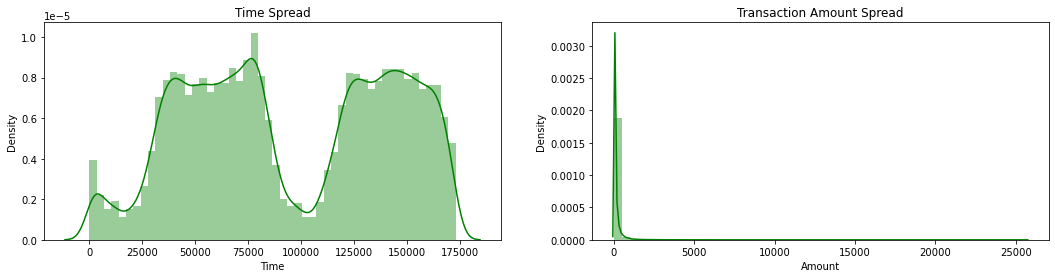

In [114]:
#consider the two characteristics "Amount" and "Time" and visualizing."
figure, ax = plt.subplots(1,2, figsize=(18,4))

sns.distplot(df['Time'], ax=ax[0], color='g')
ax[0].set_title("Time Spread")

sns.distplot(df['Amount'], ax=ax[1], color='g')
ax[1].set_title("Transaction Amount Spread")
plt.show()



## Watch how the classes are distributed using normal and abnormal transaction

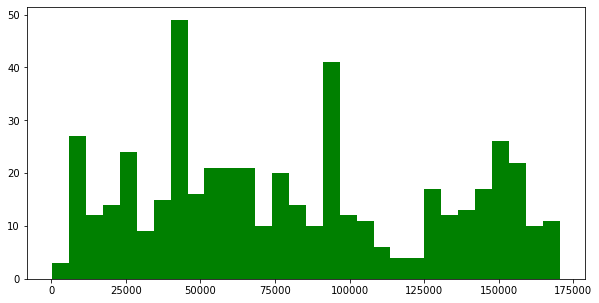

In [115]:
# Creating Normal dataframe
data_abnormal = df[df['Class'] == 1]
plt.figure(figsize=(10,5))
plt.hist(data_abnormal['Time'], label='abnormal', bins=30 , color='g')
plt.show()

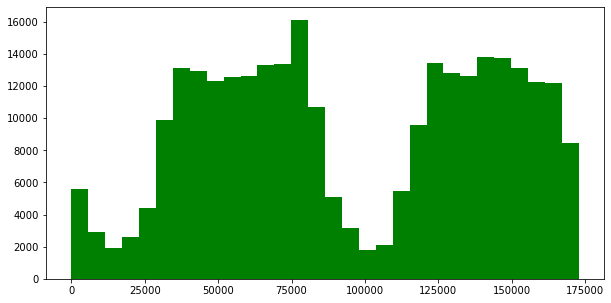

In [116]:
# Creating Normal dataframe
data_normal = df[df['Class'] == 0]
plt.figure(figsize=(10,5))
plt.hist(data_normal['Time'], label='normal', bins=30 , color='g')
plt.show()

#### I have check here the correlation of skewed data using heatmap

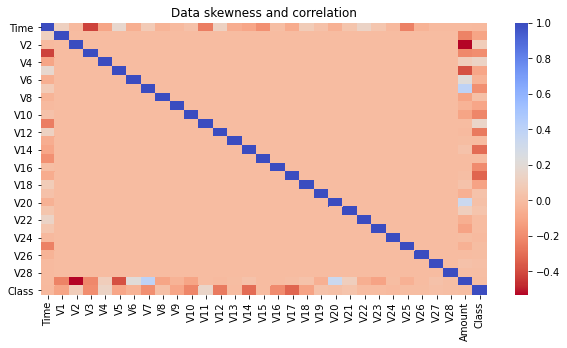

In [117]:
f,ax = plt.subplots(1, 1, figsize=(10, 5))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax )
ax.set_title('Data skewness and correlation')
plt.show()


### Insight of result
#### With regard to Time, I have notice that there is no discernible trend for abnormal and normal transactions. As a result, I have remove the Time column in the following code.

In [118]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)


## Data Preparation

#### Checking for null values in dataset

In [119]:
df.isnull().values.any()

False

#### I have observe that none of the columns have any missing data. As a result, there is no issue with null values across the dataset.

### Feature Scaling
#### We proceed to standardisation because there are no missing data. Using RobustScaler, we merely standardise Amount. Because the Amount column contains outliers, I have picked RobustScaler(), which is resistant to outliers.:

In [120]:
# for standardisation
scaler = RobustScaler().fit(df[["Amount"]])
df[["Amount"]] = scaler.transform(df[["Amount"]])

df.head().append(df.tail())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


#### Let us check if there is any difference between valid transactions and fraudulent transactions

In [121]:
print("Average Amount in a Abnormal Transaction Is : " + str(df[df["Class"] == 1]["Amount"].mean()))
print("Average Amount in a Normal Transaction Is : " + str(df[df["Class"] == 0]["Amount"].mean()))

Average Amount in a Abnormal Transaction Is : 1.4002839535836173
Average Amount in a Normal Transaction Is : 0.9263050712260325


#### As we can notice from this, the average money transaction for the fraudulent ones is more. It makes this problem crucial to deal with. Now let us try to understand the distribution of values in each feature.

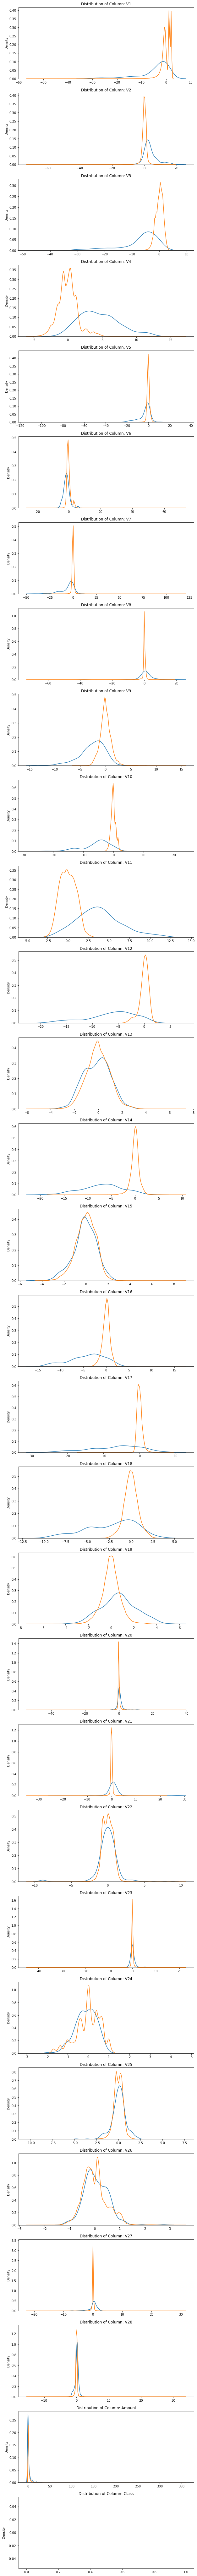

In [122]:
# Plot the distributions of the features
columns = df.iloc[:,0:30].columns
plt.figure(figsize=(10,30*5))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(df[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(df[index][df.Class == 1], hist=False, bins=20)
 sns.distplot(df[index][df.Class == 0], hist=False, bins=20)
 ax.set_xlabel("")
 ax.set_title("Distribution of Column: "  + str(index))
plt.show()

## Train-Test Split

#### Let's now separate the data into features and targets. We also divide the data into train and test:

In [123]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

# Putting target variable to y
y = df['Class']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

### Checking the Skewness

In [124]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

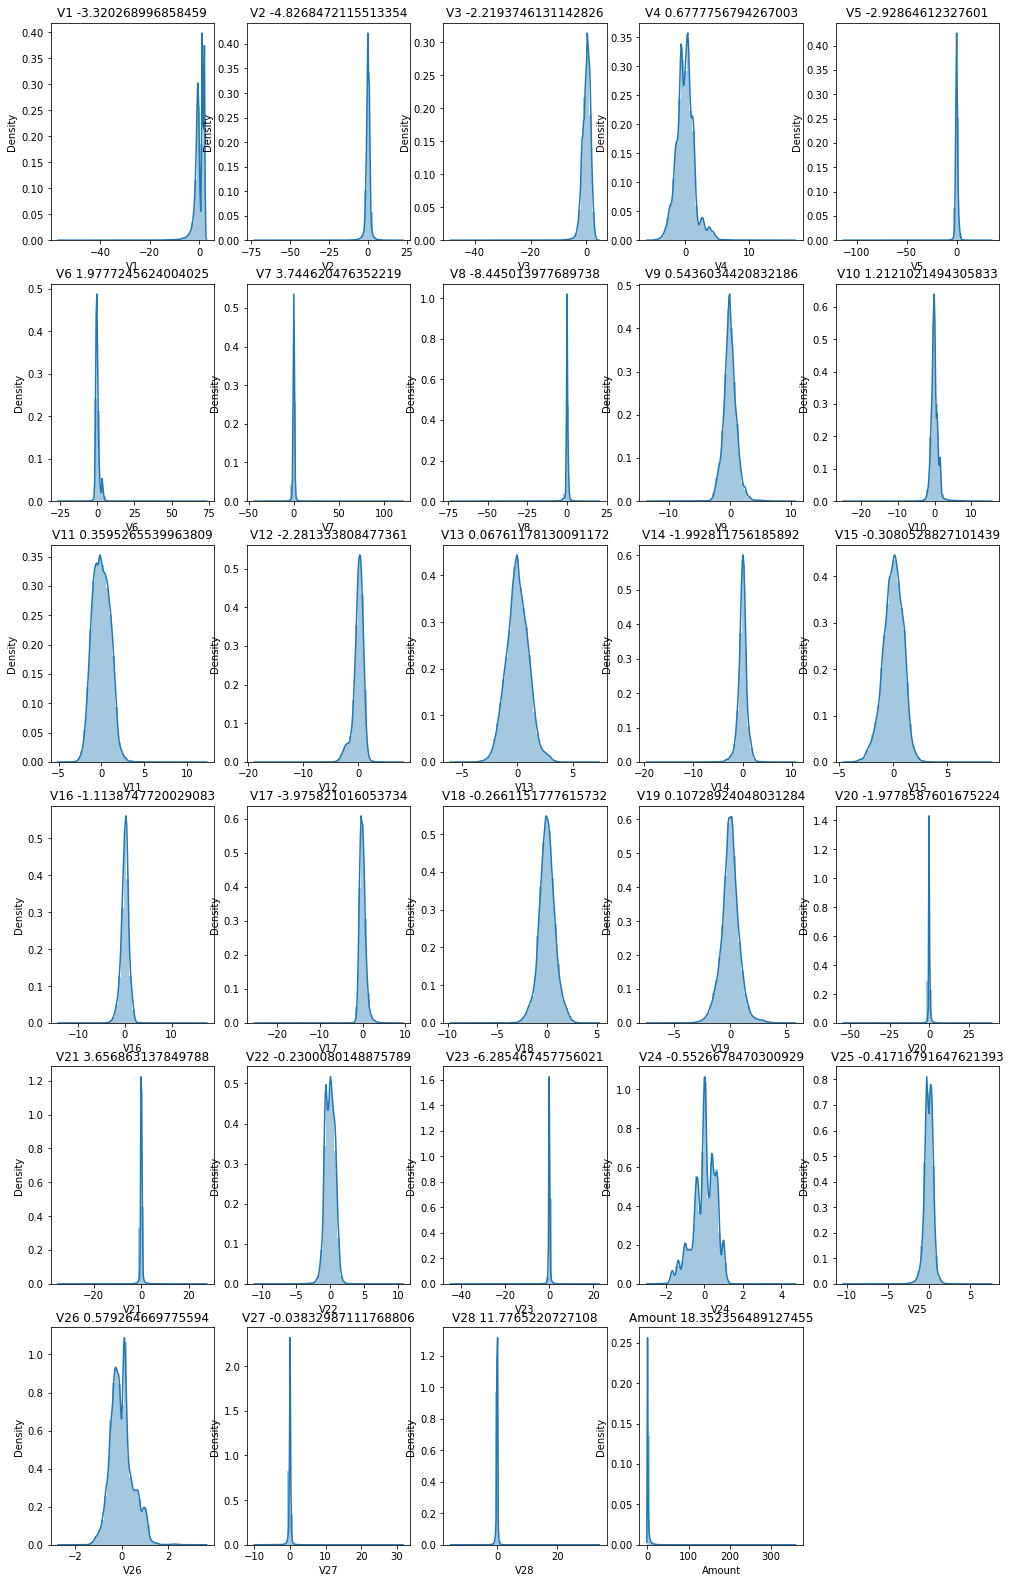

In [125]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

#### We can observe that there are several variables that are severely skewed. We shall merely reduce the skewness of those variables in order to put those into normal distribution. With PowerTransformer, I can reduce skweness.

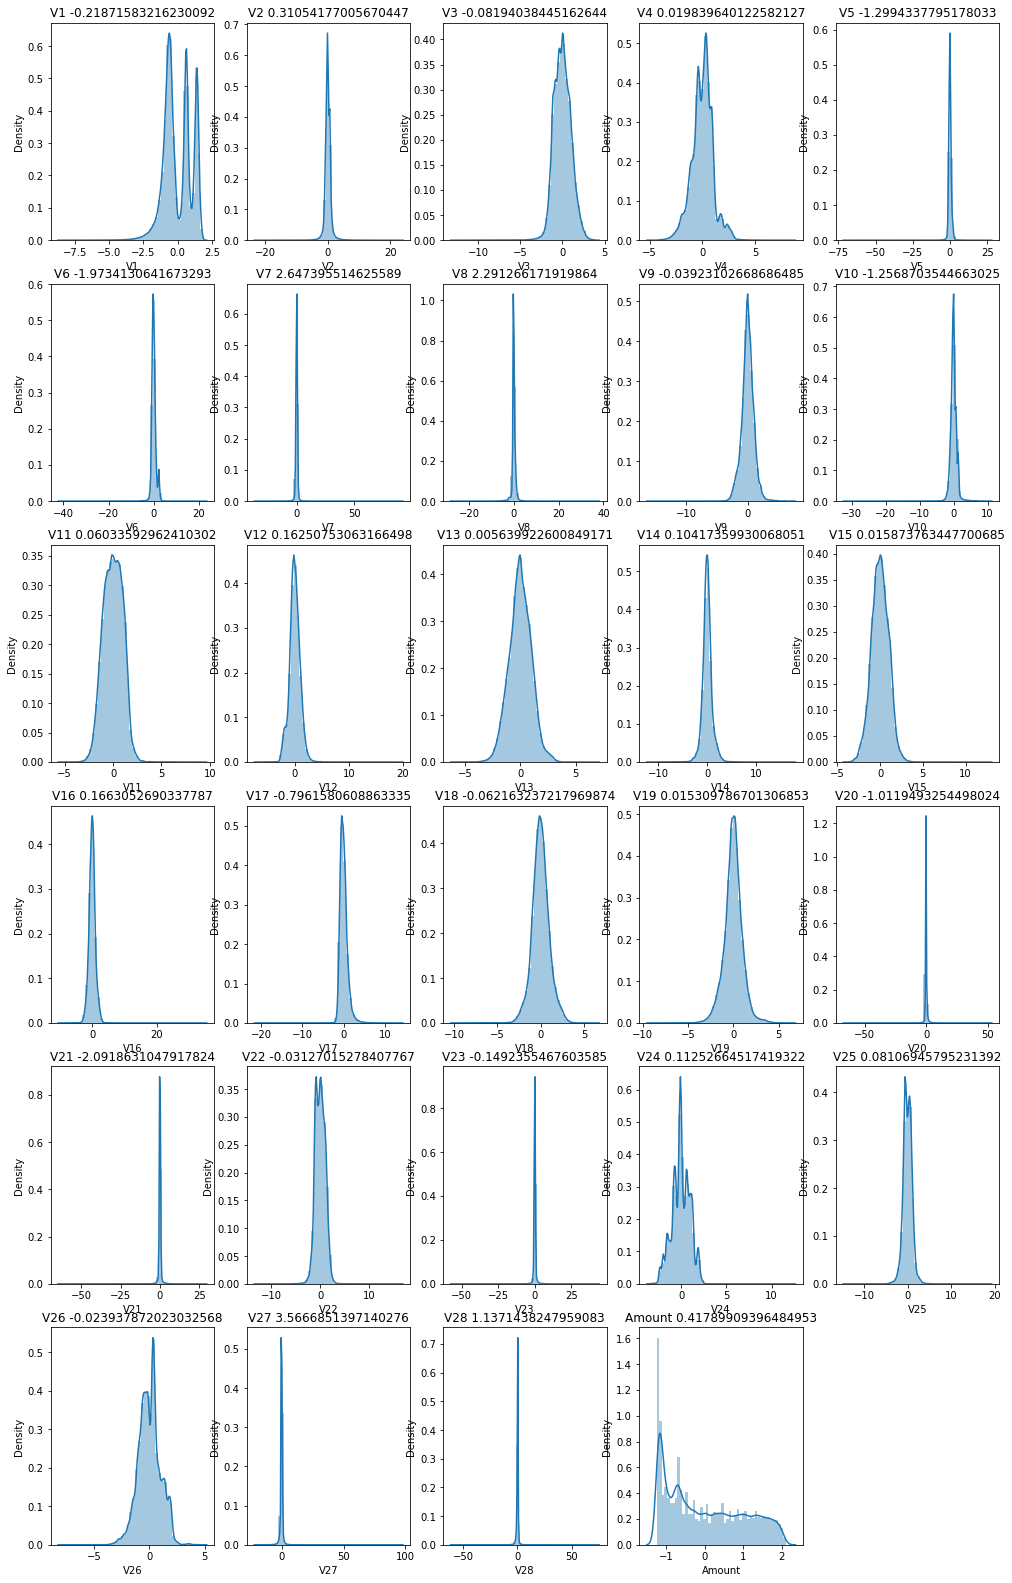

In [126]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)
# Transform the test set
X_test[cols] = pt.transform(X_test)
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

#### Now we can see that all the variables are normally distributed after the transformation.



## Model building on imbalanced data

### Logistic regression

In [163]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [165]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 394, 1: 394})


In [166]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [167]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007176,0.002045,0.002412,0.000347,0.01,{'C': 0.01},0.984739,0.965783,0.972691,0.994302,...,0.975249,0.012823,1,0.982360,0.986261,0.985112,0.980677,0.986882,0.984259,0.002369
1,0.007236,0.001088,0.002030,0.000074,0.1,{'C': 0.1},0.983775,0.960161,0.972530,0.993487,...,0.972590,0.014834,3,0.984911,0.988529,0.987098,0.982858,0.989586,0.986596,0.002439
2,0.007091,0.000824,0.002204,0.000394,1,{'C': 1},0.973173,0.964337,0.970442,0.993325,...,0.970167,0.014171,5,0.986826,0.990475,0.989184,0.985098,0.991205,0.988558,0.002282
3,0.012882,0.002874,0.003300,0.000848,10,{'C': 10},0.956787,0.973976,0.972209,0.994627,...,0.969137,0.015990,6,0.987945,0.991321,0.989961,0.985842,0.992491,0.989512,0.002378
4,0.012478,0.001277,0.002506,0.000653,100,{'C': 100},0.961124,0.976064,0.973494,0.995441,...,0.970842,0.015823,4,0.988056,0.991523,0.990001,0.986073,0.992753,0.989681,0.002391
5,0.014094,0.005091,0.002404,0.000479,1000,{'C': 1000},0.971245,0.975904,0.973494,0.995441,...,0.972866,0.015020,2,0.988116,0.991473,0.990011,0.986113,0.992843,0.989711,0.002387


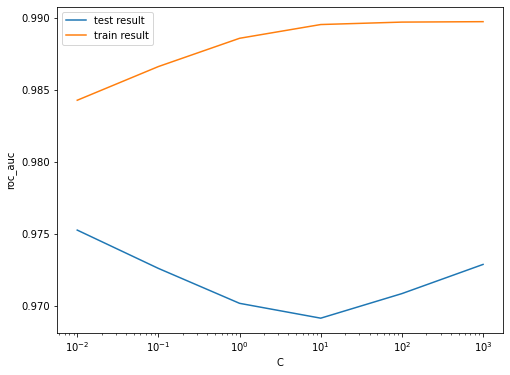

In [168]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [169]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9752487001502349 at C = 0.01


#### Logistic regression with optimal C

In [170]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [171]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

#### Prediction on the train set

In [172]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[392   2]
 [ 38 356]]


In [174]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [175]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))


Accuracy:- 0.949238578680203
Sensitivity:- 0.9035532994923858
Specificity:- 0.9949238578680203
F1-Score:- 0.9468085106382979


In [176]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       394
           1       0.99      0.90      0.95       394

    accuracy                           0.95       788
   macro avg       0.95      0.95      0.95       788
weighted avg       0.95      0.95      0.95       788



In [177]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [178]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9857442861191992

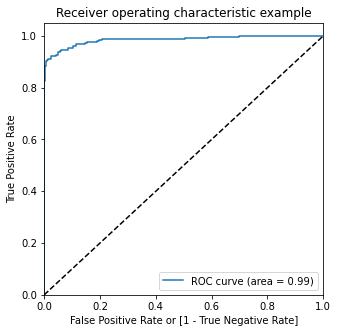

In [179]:
from sklearn import metrics
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [180]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [181]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55739  1125]
 [   10    88]]


In [182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [183]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.980074435588638
Sensitivity:- 0.8979591836734694
Specificity:- 0.9802159538548115


In [184]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.90      0.13        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [185]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [186]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9808711153285175

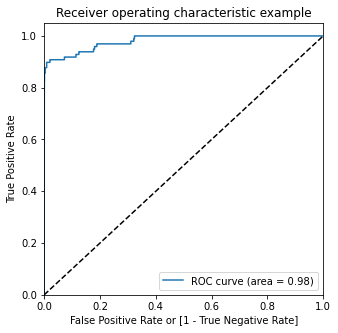

In [187]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)
